In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Data Extraction

In [20]:
vacancies = pd.read_csv("../vacancies.csv")
vacancies

,title,company,salary,english_level,experience_year,domen,work_type,company_type,test_available,views,applications,publication_date,technologies
0,Odoo Developer (Middle/Senior),Evo Mall,NaN,Intermediate,2,E-commerce / Marketplace,Office або Remote,Product,NaN,0,0,2023-11-20,"Python,Docker,HTML,CSS,Git,SQl,PostgreSQL,CI/C..."
1,Senior Python Developer,Unikoom,$4000-5000,Upper-Intermediate,5,Travel / Tourism,Тільки віддалено,Product,NaN,6,6,2023-11-20,"Python,Django,Flask,FastAPI,Docker,AWS,Elastic..."
2,Senior Python Developer,The Frontend Company,$2000-3500,Upper-Intermediate,3,NaN,Тільки віддалено,Outstaff,NaN,5,5,2023-11-18,"Python,AWS,GraphQL,React,Go,JS"
3,Senior Python Developer,AutoDS,$3000-5000,Intermediate,3,E-commerce / Marketplace,Тільки віддалено,Product,1.0,39,39,2023-11-19,"Python,Flask,FastAPI,SQLAlchemy,MongoDB,Celery..."
4,Senior Python Backend Engineer,Develux,NaN,Intermediate,5,Education,Office або Remote,Product,NaN,8,8,2023-11-18,"Python,Django,MongoDB,Docker,Kubernetes,AWS,Re..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Python Engineer,Intobi,NaN,Upper-Intermediate,5,E-commerce / Marketplace,Office або Remote,Outsource,NaN,6,6,2023-10-23,"Python,Django,React,Go"
219,Senior Python Developer,ATC,$4000-7000,Upper-Intermediate,5,SaaS,Тільки віддалено,Product,NaN,20,20,2023-10-23,"Python,FastAPI,AWS"
220,Senior QA Python Automation Engineer,Luxoft,NaN,Advanced/Fluent,5,NaN,Тільки офіс,Outsource,NaN,3,3,2023-10-23,"Python,Pytest,Git,Go,linux,OOP"
221,Senior Artificial Intelligence Consultant,Fluvius,NaN,Upper-Intermediate,5,NaN,Тільки віддалено,Outstaff,NaN,4,4,2023-10-23,"Python,TensorFlow,PyTorch,Agile,Go,Machine lea..."


# Analytics of demand for levels of English

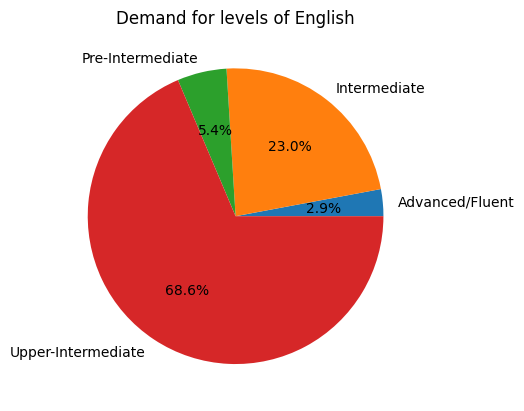

In [25]:
english_level = vacancies.groupby("english_level")["title"].count()

plt.pie(
    english_level.values,
    labels=english_level.index,
    autopct="%1.1f%%",
)
plt.title("Demand for levels of English")
plt.show()

# Analytics of demand for experience years

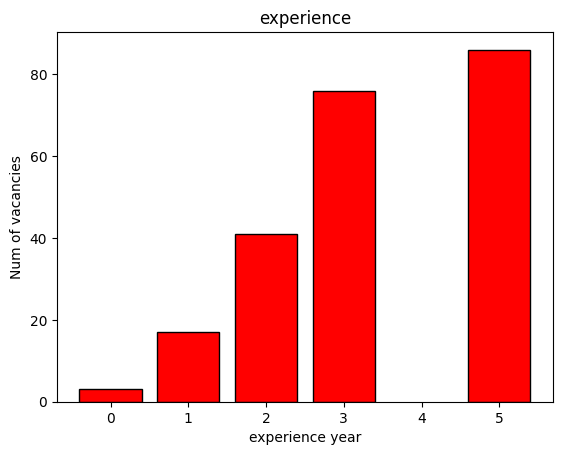

In [22]:
experience = vacancies.groupby("experience_year")["title"].count()

plt.bar(
    experience.index,
    experience.values,
    color="red",
    edgecolor="black",
)
plt.title("Demand of experience years")
plt.xlabel("Experience years")
plt.ylabel("Frequency")
plt.xticks(range(len(experience.index) + 1))
plt.show()

# Analytics for most mentioned technologies

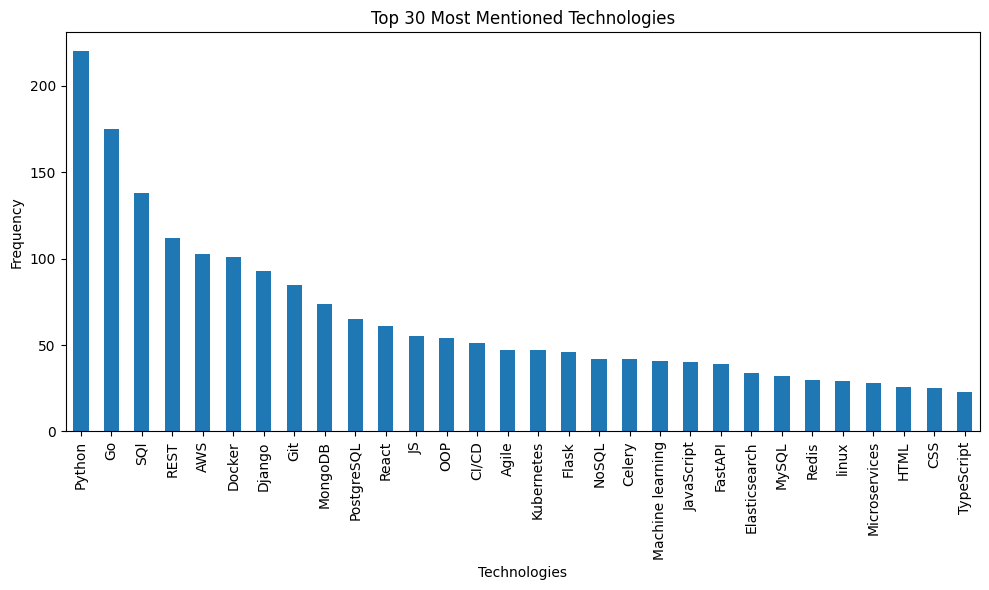

In [26]:
all_technologies = (
    vacancies["technologies"].str.split(",").explode().value_counts()
)

top_technologies = all_technologies.head(30)

plt.figure(figsize=(10, 6))
top_technologies.plot(kind="bar")
plt.title("Top 30 Most Mentioned Technologies")
plt.xlabel("Technologies")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Data wrangling for salary

In [33]:

vacancies[["min_salary", "max_salary"]] = vacancies["salary"].str.extract(r"\$(\d+)-(\d+)")

vacancies[["min_salary", "max_salary"]] = vacancies[["min_salary", "max_salary"]].astype(float)

vacancies["avg_salary"] = vacancies[["min_salary", "max_salary"]].mean(axis=1)

vacancies[["salary","min_salary", "max_salary", "avg_salary"]]

,salary,min_salary,max_salary,avg_salary
0,NaN,NaN,NaN,NaN
1,$4000-5000,4000.0,5000.0,4500.0
2,$2000-3500,2000.0,3500.0,2750.0
3,$3000-5000,3000.0,5000.0,4000.0
4,NaN,NaN,NaN,NaN
...,...,...,...,...
218,NaN,NaN,NaN,NaN
219,$4000-7000,4000.0,7000.0,5500.0
220,NaN,NaN,NaN,NaN
221,NaN,NaN,NaN,NaN


# Visualization of the dependence of salary on work experience

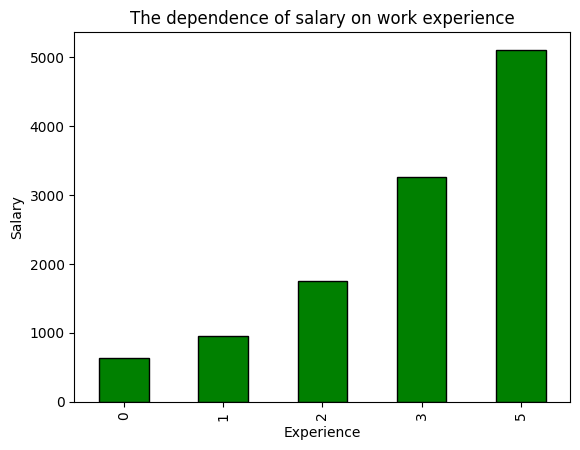

In [46]:
experience_salary = vacancies.groupby("experience_year")["avg_salary"].mean()

experience_salary.plot.bar(
    xlabel="Experience",
    ylabel="Salary",
    color="green", 
    edgecolor="black", 
    title="The dependence of salary on work experience"
)
plt.show()

In [42]:
experience_salary

experience_year
0     633.333333
1     960.000000
2    1750.000000
3    3261.904762
5    5104.848485
Name: avg_salary, dtype: float64